In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df=pd.read_csv("E:\csv\diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [57]:
df.shape

(101766, 50)

In [58]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [60]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [61]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
x=df.loc[:,['age','readmitted']]
x.head()

,age,readmitted
0,[0-10),NO
1,[10-20),>30
2,[20-30),NO
3,[30-40),NO
4,[40-50),NO


In [64]:
def map(x):
    return x.map({'NO':0,'>30':2,'<30':1,'[0-10)':10,'[10-20)':20,'[20-30)':30,'[30-40)':40,'[40-50)':50,'[50-60)':60,'[60-70)':70,'[70-80)':80,'[80-90)':90,'[90-100)':100})

In [65]:
x=x.apply(map)
x.head()

,age,readmitted
0,10,0
1,20,2
2,30,0
3,40,0
4,50,0


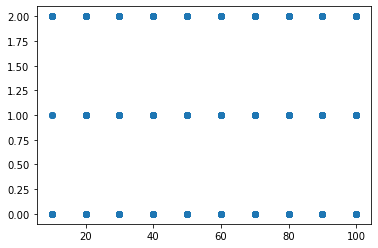

In [78]:
plt.scatter(x['age'],x['readmitted'])
plt.show()

WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.
The formula to calculate the value of WCSS (for 3 clusters) is given below:
WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3
distance(Pi C3)2

In the above formula of WCSS,
∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data
point and its centroid within a cluster1 and the same for the other two terms.
To measure the distance between data points and centroid, we can use any method such as
Euclidean distance or Manhattan distance.
To find the optimal value of clusters, the elbow method follows the below steps:
It executes the K-means clustering on a given dataset for different K values
(ranges from 1-10).
For each value of K, calculates the WCSS value.
Plots a curve between calculated WCSS values and the number of clusters K.
The sharp point of bend or a point of the plot looks like an arm, then that point is
considered as the best value of K


In [79]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

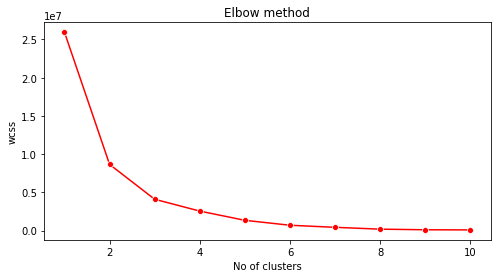

In [80]:
plt.figure(figsize=(8,4))
import seaborn as sns
sns.lineplot(x=range(1,11),y=wcss,marker='o',color='red')
plt.title("Elbow method")
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [117]:
# Fitting K-Means to the dataset
kmeans=KMeans(n_clusters=6,init="k-means++",random_state=42)
y_predict=kmeans.fit_predict(x)

In [118]:
y_predict

array([5, 5, 5, ..., 0, 2, 0])

In [119]:
x['cluster']=y_predict
x.head()

,age,readmitted,cluster
0,10,0,5
1,20,2,5
2,30,0,5
3,40,0,1
4,50,0,1


In [129]:
df1=x[x.cluster==0]
df2=x[x.cluster==1]
df3=x[x.cluster==2]
df4=x[x.cluster==3]
df5=x[x.cluster==4]
df6=x[x.cluster==5]

df3.head()

,age,readmitted,cluster
5,60,2,4
6,70,0,3
11,70,1,3
14,70,2,3
15,70,0,3


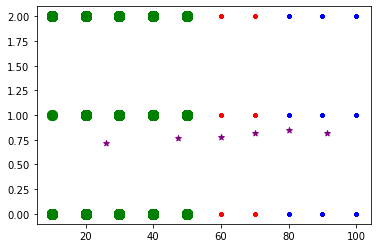

In [133]:
plt.scatter(df1.age,df1['readmitted'],s=10,c='blue')
plt.scatter(df2.age,df2['readmitted'],s=100,c='green')
plt.scatter(df3.age,df3['readmitted'],s=10,c='red')
plt.scatter(df4.age,df4['readmitted'],s=100,c='yellow')
plt.scatter(df5.age,df5['readmitted'],s=10,c='lightblue')
plt.scatter(df6.age,df6['readmitted'],s=10,c='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')